# Density profiles

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from multirods_gpe.style import set_base_style
from multirods_gpe import MultiRods
from multirods_gpe.bloch import ideal_eigen_states, GPEBlochState, GPEStateSet
from multirods_gpe.fdiff import EigSolverType
from multirods_gpe.spectrum import IdealSpectrum, GPESpectrum, GPEBlochStateType, BdGSpectrum
from multirods_gpe.model import ER

In [3]:
from itertools import cycle, islice
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

## EDIT: Paths and non-standard imports >>>

In [4]:
import os, sys
proj_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
sys.path.insert(0, proj_dir)

### <<< End of paths and non-standard import
----

## Square lattice, $b = a$

In [5]:
v0, r, gn0 = 1 * ER, 1, 0.25 * ER

system = MultiRods(v0, r, gn0)
system.context.partition_order = 8
system.context.fd_eig_solve_mode = EigSolverType.SPARSE
system.context.nd_newton_abs_tol = 1e-2

### Calculating density.

In [6]:
from src.exec.multirods.spectrum import calculate_bands

In [23]:
macro_kz, exc_qz = 0 *0.025 * pi, 0
bloch_bands = [1, 2, 3]
number_of_states = 2 ** 5

ideal_spec, gpe_spec_data, bdg_spec = calculate_bands(system, macro_kz, bloch_bands, number_of_states)

C:\Users\oarodriguez\Academic Projects\MultiRodsGPE\multirods_gpe\bloch.py:325: ComplexWarning: Casting complex values to real discards the imaginary part
  funcs_mesh = p_fn_mesh.astype(np.float64), q_fn_mesh
C:\Users\oarodriguez\Academic Projects\MultiRodsGPE\multirods_gpe\bloch.py:618: ComplexWarning: Casting complex values to real discards the imaginary part
  eig_mode._energy = float(energy)
C:\Users\oarodriguez\Academic Projects\MultiRodsGPE\multirods_gpe\bloch.py:853: ComplexWarning: Casting complex values to real discards the imaginary part
  states_data = np.array(states_data, dtype=data_dtype)
Progress: 100% - State momentum: 1 k_OPT -  |🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀| Time: 0:00:10
Progress: 100% - State momentum: -1 k_OPT -  |🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀| Time: 0:00:00
Progress: 100% - State momentum: 0 k_OPT -  |🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀| Time: 0:00:13
Progress: 100% - State momentum: 0 k_OPT -  |🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀| Time: 0:00:01
Progress: 100% - State momentum: 1 k_OPT -  |🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀| Tim

In [25]:
# ideal_spec, gpe_spec
bdg_spec.get(3)

In [26]:
DASHES = [
    (5, 0.01),                  # "Solid"
    (5, 5/4),                   # Dash small-space
    (5, 5/4, 5/4, 5/4),         # Dash-dot
    (5/4, 5/4),                 #  Dot
    (5, 5/4, 5/2, 5/4, 5/2, 5/4),         # Dash, small-dash
    (2, 1, 1, 1),    # Dot-dash
    (4, 1, 1, 1),   # Long dash - dot
    (4, 1, 2, 1),   # Long dash - dot
    (6, 1)
]


In [27]:
def make_plot_label(v0_er, r, gn0_er):
    """"""
    v0_lbl = r'$V_0 = E_R$' if v0_er == 1 else r'$V_0 = {:.5G}E_R$'.format(v0_er) 
    r_lbl =  r'$b = a$' if r == 1 else r'b = ${:.5G}a$'.format(r)
    gn0_lbl = r'$gn_0 = E_R$' if gn0_er == 1 else r'$gn_0 = {:.5G}E_R$'.format(gn0_er)
    lbl = v0_lbl + '\n' + r_lbl + '\n' + gn0_lbl
    
    return lbl

E:\oarodriguez\Anaconda3\envs\python36test\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


C:\Users\oarodriguez\Academic Projects\PhDCode\reports\figures\ekz[bdg][reduced]_v0-1_r-1_gn0-0-dot-25.pdf


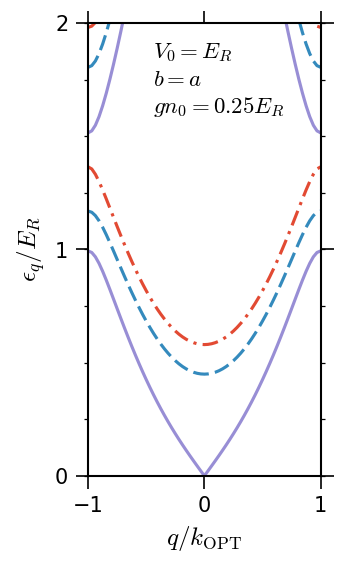

In [36]:
# Physical parameters
macro_kz = 0
bloch_band = 1

# %% Figure base style
set_base_style()

figure(figsize=(2, 4))

ax = gca()

rcParams['axes.linewidth'] = 0.5

dashes = cycle(DASHES)

# Switches
subplot_left = True
if subplot_left:
    add_legend = False
else:
    add_legend = True

 # Some dimensions
y_min = 0
y_max = 2

skip_ideal = False
lc = None
# system = systems[0]
gn0 = system.interaction_strength

# GPE spectrum.
lc = None
for ctr, data in enumerate(gpe_spec_data):
    
    gpe_spec_, normal_states, saddle_states = data
    system = gpe_spec_.system
    r = float(system.lattice_ratio)
    gn0 = system.interaction_strength
    
    dash = next(dashes)
    if system.interaction_strength:
#         phi_k = absolute(state.wave_fn) ** 2
        plb = r'${:5G}$'.format(gn0 / ER)
    else:
#         phi_k = absolute(state.wave_fn) ** 2
        plb = None

    z = system.domain_mesh
    vz_unit = system.potential(z) / v0
    za = 1 / (1 + r) / 2
    
    
    for state_set in gpe_spec_.extend_state_set(normal_states, extend_to_zone=2):

        kz = state_set.momentum
        energy = state_set.energy

        line, = ax.plot(kz / pi, energy / ER, color=lc, dashes=(5, 2, 1, 2))
        lc = line.get_color()
        
    for state_set in gpe_spec_.extend_state_set(saddle_states, extend_to_zone=2):

        kz = state_set.momentum
        energy = state_set.energy

        line, = ax.plot(kz / pi, energy / ER, color=lc, dashes=(5, 2, 1, 2))
        lc = line.get_color()
#         line, = ax.plot(kz / pi, energy)

# Ideal Spectrum
lc = None
for bloch_band in range(1, 4):
    band_states = ideal_spec.get(bloch_band)
    line, = pyplot.plot(band_states.momentum / pi, band_states.energy / ER,
                        color=lc, dashes=(5, 2))
    lc = line.get_color()


# Bogoliubov-de Gennes Spectrum.
lc = None
for bloch_band in range(1, 4):
    band_states = bdg_spec.get(bloch_band)
    line, = pyplot.plot(band_states.momentum / pi, band_states.energy / ER,
                        color=lc)
    lc = line.get_color()

# print(gn0 / ER)
plt_lb = make_plot_label(v0 / ER, r, gn0 / ER)
ax.text(-0.44, 0.80 * y_max, plt_lb, fontsize=11)

add_legend = False
if add_legend:
    legend_ = ax.legend(bbox_to_anchor=(0.59, 0.715), loc='best')
    leg_title = legend_.get_title()
    legend_.set_title(r'$gn_0 / E_R$', prop=dict(size=9))
    leg_frame = legend_.get_frame()
    setp(leg_frame, fc='#FFFFFF', alpha=0.5)
    

y_loc = MultipleLocator(1)
y_fmt = FormatStrFormatter('%.2G')
y_min_loc = MultipleLocator(0.25)

ax.yaxis.set_major_locator(y_loc)
ax.yaxis.set_major_formatter(y_fmt)
ax.yaxis.set_minor_locator(y_min_loc)

ax.set_xlabel(r'$q / k_\mathrm{OPT}$')
ax.set_ylabel(r'$\epsilon_q / E_R$')

ax.set_xlim(-1, 1)
ax.set_ylim(y_min, y_max)

# Some manual labelling
# ax.set_xticks([-0.5, 0, .5])
# ax.set_xticklabels([-.5, '0', .5])

fn_fmt = r'ekz[int]_v0-{:.5G}_r-{:.5G}_gn0-{:.5G}'
file_name = fn_fmt.format(v0 / ER, r, gn0 / ER)

full_path = os.path.join(proj_dir,
                         'reports', 'figures',
                         '{:s}.pdf'.format(file_name.replace('.', '-dot-')))

reduced = True
if reduced:
    fn_fmt = r'ekz[bdg][reduced]_v0-{:.5G}_r-{:.5G}_gn0-{:.5G}'
else:
    fn_fmt = r'ekz[bdg]_v0-{:.5G}_r-{:.5G}_gn0-{:.5G}'

file_name = fn_fmt.format(v0 / ER, r, gn0 / ER)

full_path = os.path.join(proj_dir,
                         'reports', 'figures',
                         '{:s}.pdf'.format(file_name.replace('.', '-dot-')))

savefig(full_path)

print(full_path)